In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import torch
import copy
from collections import defaultdict

from Components.ConditionalNormalDistribution import ConditionalNormalDistribution
from Components.DifferentiablePolynomial import DifferentiablePolynomial
from Models.ModelExponential import ModelExponential
from Models.ModelSinCos import ModelSinCos
from Models.ModelLogistic import ModelLogistic
from Models.ModelSigmoid import ModelSigmoid
from Composition.SequentialSystem import SequentialSystem
from SearchAlgorithm.skeleton import BO_skeleton, BO_graph, BO_graph_turbo, BO_graph_local_loss, BO_graph_local_loss_with_explicit_noise

from GraphDecomposition.DirectedFunctionalGraph import DirectedFunctionalGraph
from Components.DifferentiablePolynomial import DifferentiablePolynomial
from Models.ModelSinCos import ModelSinCos
from Models.ModelConstant import ModelConstant
from Models.ModelWeightedSum import ModelWeightedSum
from Models.ModelExponential import ModelExponential

%load_ext autoreload
%autoreload 2
from GraphDecomposition.Heuristic import *
from helper import *
from Plotting.HeatMapLossFunction import *

torch.manual_seed(10)

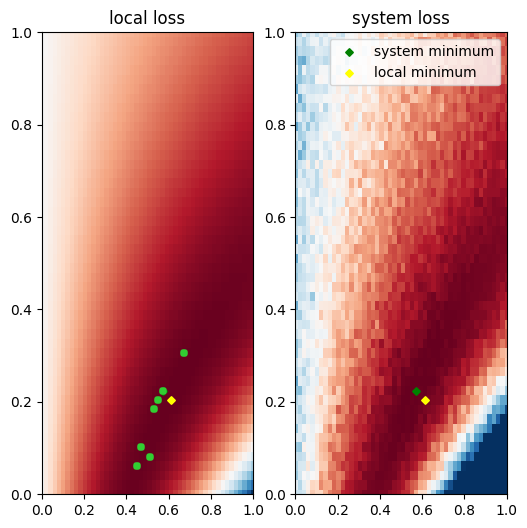

In [2]:
plt.rcParams['figure.figsize'] = [6, 6]
import math
import numpy as np
import matplotlib.pyplot as plt

from Components.ConditionalNormalDistribution import ConditionalNormalDistribution
from Components.DifferentiablePolynomial import DifferentiablePolynomial
from Models.ModelExponential import ModelExponential
from Plotting.HeatMapLossFunction import *
from Composition.SequentialSystem import SequentialSystem
from SearchAlgorithm.skeleton import BO_skeleton
from Plotting.HeatMapLossFunction import *

# f = conditional1DNormal()
f = DifferentiablePolynomial() # black box function (comes second)
g = ModelExponential() # white box function (comes first)

ground_truth_theta_0 = 0.6
ground_truth_theta_1 = 0.2
noise_mean = 0.05
noise_std = 0.02

# generate local dataset over g
X_local = np.random.uniform(1, 3, size=100)
y_local = g.evaluate(torch.Tensor(X_local), ground_truth_theta_0, ground_truth_theta_1) # labeling effort of local
# generate end to end dataset (use same X)
X_global = X_local
z_global = f.evaluate(y_local, 1,1,1) # ground truth
#z_global_pertubed = f.evaluate(g.evaluate(torch.Tensor(X_global), ground_truth_theta_0, ground_truth_theta_1), 0.3,0.5,0.3) # perturbed
z_global_pertubed = z_global
plt, fig, ax = HeatMapLossFunction(X_local, y_local, X_global, z_global_pertubed, f, g, plt, noise_mean, noise_std)

# train function g on x,y ("local") using local gradient descent
# all_theta_via_local = g.fit(X_local,y_local)
# y_pred = g.predict(X_global.reshape(len(X_global),1))

# # train composite function f.g on x,z ("global") using BO
# s = SequentialSystem()
# g = ModelExponential() # reset
# s.addModel(g, X_local, y_local)
# s.addComponent(f)
# s.addGlobalData(X_global, z_global)

# all_theta_via_global = BO_skeleton(s)
# #all_theta_via_global = s.fit_global_differentiable() # this performs end to end gradient descent

# all_theta_via_local = np.array(all_theta_via_local)
# all_theta_via_global = np.array(all_theta_via_global)

# ax[0].scatter(all_theta_via_local[:,0], all_theta_via_local[:,1], s=0.2,alpha=1, label="gradient climbing over local data set")
# ax[0].scatter(all_theta_via_global[:,0], all_theta_via_global[:,1], s=1,alpha=1, label="end to end learning")
# lgnd = ax[0].legend()

# ax[1].scatter(all_theta_via_local[:,0], all_theta_via_local[:,1], s=0.2,alpha=0.5)
# ax[1].scatter(all_theta_via_global[:,0], all_theta_via_global[:,1], s=1,alpha=0.5)

plt.show()

In [6]:
# ground truth param

ground_truth_param = {1 : np.array([0.7, 0.9, -0.5]), 2: np.array([0.3, 0.7]), 8: np.array([-0.2, -0.2]), 9: np.array([-0.5, 0.5]), 10: np.array([-0.2, 0.1]), 11: np.array([-0.3, 0.3, 0.2]),
                      12: np.array([0.1, 0.1]), "Blackbox3":np.array([1.2, 0.8]), 4:np.array([1.1, -0.5]), "Blackbox5":np.array([0.7, -0.5]),
                      "Blackbox6": np.array([0.7, 1.1]), 7: np.array([0.7, -0.5])}



# Generate the system

adding edge from Blackbox6 to Blackbox3
adding edge from 7 to Blackbox3
adding edge from 1 to Blackbox3
adding edge from 2 to Blackbox3
adding edge from 4 to Blackbox5
adding edge from 2 to Blackbox5
adding edge from 7 to Blackbox6
adding edge from Blackbox5 to Blackbox6
setting:  [ 0.7  0.9 -0.5]
setting:  [0.3 0.7]
setting:  [ 1.1 -0.5]
setting:  [ 0.7 -0.5]
setting:  [-0.2 -0.2]
setting:  [-0.5  0.5]
setting:  [-0.2  0.1]
setting:  [-0.3  0.3  0.2]
setting:  [0.1 0.1]
setting:  [1.2 0.8]
setting:  [ 0.7 -0.5]
setting:  [0.7 1.1]


/home/chenzhil/AutoAI/GraphDecomposition/DirectedFunctionalGraph.py:36: UserWarning: Parents of Blackbox3 previously defined as ['Blackbox6', 7], attempting to overwrite with [1, 2]
  warnings.warn(f'Parents of {v_of_edge} previously defined as {self.nodes[v_of_edge]["parents"]}, attempting to overwrite with {u_of_edge}')
/home/chenzhil/AutoAI/GraphDecomposition/DirectedFunctionalGraph.py:36: UserWarning: Parents of 4 previously defined as [2], attempting to overwrite with ['Blackbox3']
  warnings.warn(f'Parents of {v_of_edge} previously defined as {self.nodes[v_of_edge]["parents"]}, attempting to overwrite with {u_of_edge}')


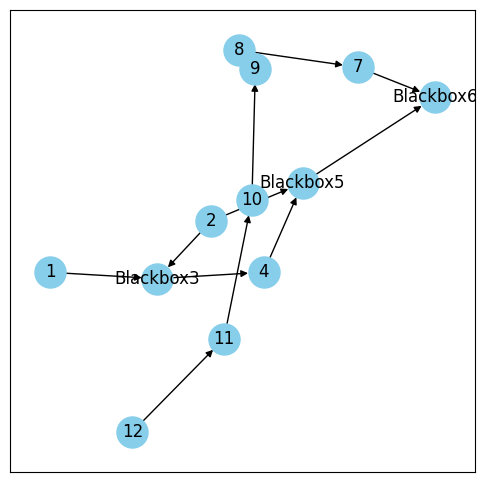

In [7]:
DG = generate_dg(ground_truth_param,noise=0.05,seed=5)
nx.draw_networkx(DG, node_size=500, node_color="skyblue")
plt.show()

# Gradient Descent of local components

final system loss:  tensor(0.1547, dtype=torch.float64)


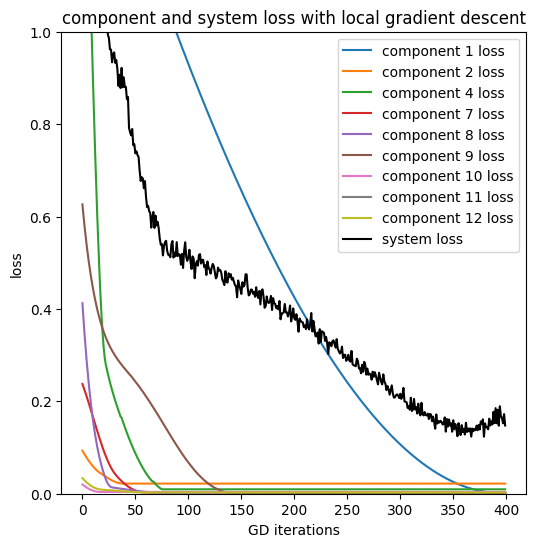

best system loss: tensor(0.1234, dtype=torch.float64)


In [8]:
torch.manual_seed(10)
#grad descent
DG.random_initialize_param(100)
lower_bound_local_loss, all_loss = show_system_loss_from_grad_descent(DG, itr=400, plot=True)
lower_bound_local_loss = [x.detach().numpy().tolist() for x in lower_bound_local_loss]
print("best system loss:", min(all_loss["system"]))

# torch.manual_seed(10)
# #grad descent
# DG.random_initialize_param(100)
# lower_bound_local_loss, all_loss = show_system_loss_from_grad_descent(DG, itr=400, plot=True)
# lower_bound_local_loss = [x.detach().numpy().tolist() for x in lower_bound_local_loss]
# print("best system loss:", min(all_loss["system"]))

# torch.manual_seed(10)
# #grad descent
# DG.random_initialize_param(100)
# lower_bound_local_loss, all_loss = show_system_loss_from_grad_descent(DG, itr=400, plot=True)
# lower_bound_local_loss = [x.detach().numpy().tolist() for x in lower_bound_local_loss]
# print("best system loss:", min(all_loss["system"]))

# torch.manual_seed(10)
# #grad descent
# DG.random_initialize_param(100)
# lower_bound_local_loss, all_loss = show_system_loss_from_grad_descent(DG, itr=400, plot=True)
# lower_bound_local_loss = [x.detach().numpy().tolist() for x in lower_bound_local_loss]
# print("best system loss:", min(all_loss["system"]))

# torch.manual_seed(10)
# #grad descent
# DG.random_initialize_param(100)
# lower_bound_local_loss, all_loss = show_system_loss_from_grad_descent(DG, itr=400, plot=True)
# lower_bound_local_loss = [x.detach().numpy().tolist() for x in lower_bound_local_loss]
# print("best system loss:", min(all_loss["system"]))

In [4]:
DG.system_y

tensor([1.8578, 1.6438, 1.5730, 1.5065, 1.7841, 1.6959, 1.6927, 1.6770, 1.5412,
        1.7148, 1.7812, 1.5272, 1.5973, 1.6448, 1.6800, 1.7490, 1.9324, 1.6506,
        1.9096, 1.5936, 1.8095, 1.9446, 1.5608, 1.7636, 1.6871, 1.7213, 1.7211,
        1.6379, 1.6547, 1.8710, 1.7003, 1.5041, 1.7153, 1.8237, 1.9619, 1.7495,
        1.7890, 1.7129, 1.6612, 1.6856, 1.5150, 1.9027, 1.7557, 1.9093, 1.6690,
        1.7719, 1.6489, 1.9661, 1.5412, 1.7740, 1.6893, 1.7424, 1.7777, 1.9659,
        1.5370, 1.7190, 1.6615, 1.6045, 1.9269, 1.8928, 1.8417, 1.6451, 1.8029,
        1.7429, 1.6946, 1.7716, 1.4966, 1.8771, 1.6207, 1.8291, 1.5715, 1.5750,
        1.7134, 1.8571, 1.8384, 1.5903, 1.3068, 1.9117, 1.7571, 1.6315, 1.6276,
        1.5561, 1.6310, 1.5874, 1.6220, 1.7356, 1.5625, 1.5767, 1.9191, 1.6017,
        1.8523, 1.7344, 1.8235, 2.0436, 1.6395, 1.8993, 1.7126, 1.8290, 1.5632,
        1.7046], dtype=torch.float64)

In [ ]:

DG.random_initialize_param(5)
print(DG.get_system_loss())


tensor(1.5735, dtype=torch.float64)


In [ ]:
from numpy import genfromtxt
import pandas as pd
import scipy
def plot_trials_regret(csv_file, legend="",c="b", iteration=200, end_iteration=0):
    my_data = genfromtxt(csv_file, delimiter=' ')
    
    starting_iteration = 0
    
    # interpolate
    my_data_new = []
    
    if not my_data.ndim == 1:
        if len(my_data[0]) < iteration:
            for trial in my_data:
                #trial = np.insert(trial, 0,3.5)
                trial_new = np.full(iteration, np.nan)
                trial_new[::int((iteration/len(trial)))] = trial
                trial_new = pd.Series(trial_new).interpolate().tolist()
                my_data_new.append(trial_new)
            my_data = np.array(my_data_new)
    
    #my_data = np.hstack((np.ones((my_data.shape[0], 1)) * -2.8, my_data))
    mean = -1 * np.mean(np.array(my_data), axis=0)[:end_iteration]
    std = scipy.stats.sem(np.array(my_data), axis=0)[:end_iteration]
    
    # mean = np.insert(mean, 0, 2.5)
    # std = np.insert(std, 0, 0.2)
    print("mean shape: ", mean[-1])
    print("std shape: ", std[-1])
    # pad
    # if len(mean) < iteration:
    #     mean = np.array([x for x in mean for _ in range(int(iteration / len(mean)))])
    #     std = np.array([x for x in std for _ in range(int(iteration / len(std)))])

    plt
    plt.plot(range(len(mean[starting_iteration:])), mean[starting_iteration:],c=c,linewidth=1.5,solid_capstyle='round',label=legend)
    plt.fill_between(range(len(mean[starting_iteration:])), mean[starting_iteration:]-std[starting_iteration:], mean[starting_iteration:]+std[starting_iteration:], color=c, alpha=0.1)
    plt.legend(fontsize=15)
    plt.xlabel("system queries", fontsize=15)
    plt.ylabel("system loss", fontsize=15)
    plt.xticks(np.arange(0.0,end_iteration+1,25))
    plt.ylim(0, 5)
    #plt.yticks(np.arange(0.0,20,5))
    # plt.title(csv_file)
    # plt.show()

mean shape:  0.02854644537920989
std shape:  0.004126931217707039
mean shape:  0.0639101800069543
std shape:  0.02005005814788793


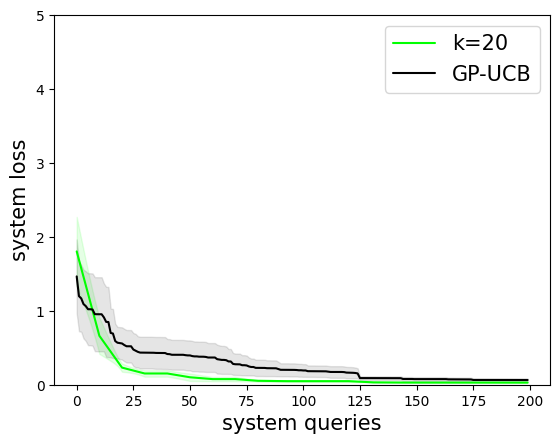

In [ ]:
plot_trials_regret("result/our_bo_20_runB_10.csv", legend="k=20",c="lime", iteration=iterations, end_iteration=end_iteration)
plot_trials_regret("result/vanilla_BO_200_runB.csv", legend="GP-UCB",c="black", iteration=iterations, end_iteration=end_iteration)


mean shape:  0.15295877533646002
std shape:  0.0078044462173825204
mean shape:  0.13971903654420692
std shape:  0.006024662208446789
mean shape:  0.15751266424661559
std shape:  0.002829642594439884
mean shape:  0.14811151396825598
std shape:  0.00199741953513751
mean shape:  0.12834017971057915
std shape:  0.00219902494877081
mean shape:  0.19920984046270201
std shape:  0.008631703733794743


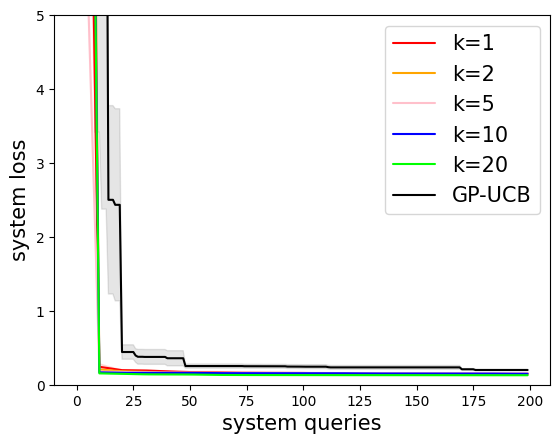

In [ ]:
iterations = 200
end_iteration = 200
plot_trials_regret("result/mnist_our_BO_data_seed_99_starting_grad_seed_5_noise_pos_0.3_std_0.2_1.csv", legend="k=1",c="red", iteration=iterations, end_iteration=end_iteration)
plot_trials_regret("result/mnist_our_BO_data_seed_99_starting_grad_seed_5_noise_pos_0.3_std_0.2_2.csv", legend="k=2",c="orange", iteration=iterations, end_iteration=end_iteration)
plot_trials_regret("result/mnist_our_BO_data_seed_99_starting_grad_seed_5_noise_pos_0.3_std_0.2_5.csv", legend="k=5",c="pink", iteration=iterations, end_iteration=end_iteration)
plot_trials_regret("result/mnist_our_BO_data_seed_99_starting_grad_seed_5_noise_pos_0.3_std_0.2_10.csv", legend="k=10",c="blue", iteration=iterations, end_iteration=end_iteration)
plot_trials_regret("result/mnist_our_BO_data_seed_99_starting_grad_seed_5_noise_pos_0.3_std_0.2_20.csv", legend="k=20",c="lime", iteration=iterations, end_iteration=end_iteration)
plot_trials_regret("result/mnist_vanilla_BO_data_seed_99_starting_grad_seed_5_noise_pos_0.3_std_0.2.csv", legend="GP-UCB",c="black", iteration=iterations, end_iteration=end_iteration)


mean shape:  4.974933491043311
std shape:  0.3655789617750432


mean shape:  5.0563094143144935
std shape:  0.3020838813409036
mean shape:  6.372511189101978
std shape:  0.7085991204063926
mean shape:  4.487542336071389
std shape:  0.7312467859485388
mean shape:  3.980648934668223
std shape:  0.3250314084812759
mean shape:  6.46152881327031
std shape:  0.1720908326094094


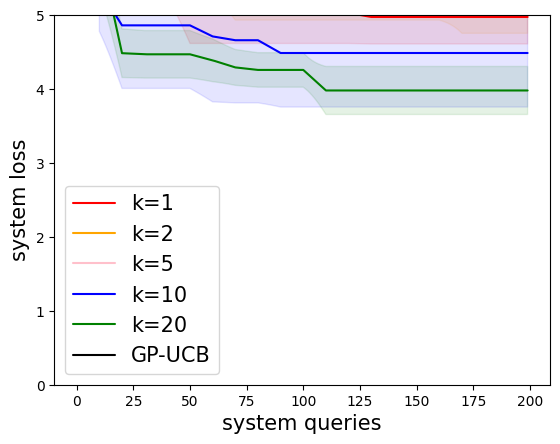

In [ ]:
iterations = 200
end_iteration = 200
plot_trials_regret("result/health_care_3_neg_1_0.5_start_seed_11_1.csv", legend="k=1",c="red", iteration=iterations, end_iteration=end_iteration)
plot_trials_regret("result/health_care_3_neg_1_0.5_start_seed_11_2.csv", legend="k=2",c="orange", iteration=iterations, end_iteration=end_iteration)
plot_trials_regret("result/health_care_3_neg_1_0.5_start_seed_11_5.csv", legend="k=5",c="pink", iteration=iterations, end_iteration=end_iteration)
plot_trials_regret("result/health_care_3_neg_1_0.5_start_seed_11_10.csv", legend="k=10",c="blue", iteration=iterations, end_iteration=end_iteration)
plot_trials_regret("result/health_care_3_neg_1_0.5_start_seed_11_20.csv", legend="k=20",c="green", iteration=iterations, end_iteration=end_iteration)
plot_trials_regret("result/health_care_vanilla_BO.csv", legend="GP-UCB",c="black", iteration=iterations, end_iteration=end_iteration)


mean shape:  0.5470535885958423
std shape:  0.21595900450992886
mean shape: 

 0.4415532892449434
std shape:  0.09786042226850081
mean shape:  0.2840495914235768
std shape:  0.04795972774890086
mean shape:  0.283155928679641
std shape:  0.03977456324607605
mean shape:  0.19981393051644125
std shape:  0.05096960170451301


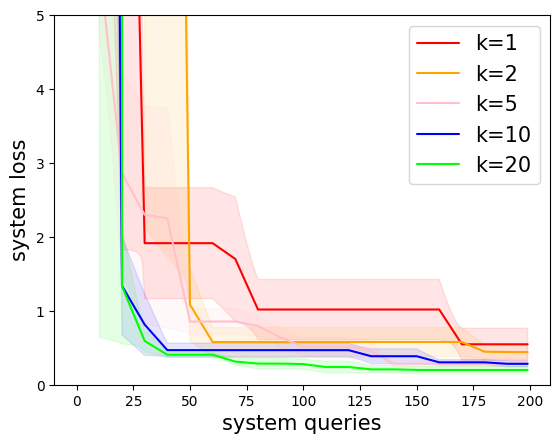

In [ ]:
iterations = 200
end_iteration = 200
plot_trials_regret("result/large_mnist_our_BO_data_seed_99_starting_grad_seed_5_noise_pos_0.3_std_0.2_1.csv", legend="k=1",c="red", iteration=iterations, end_iteration=end_iteration)
plot_trials_regret("result/large_mnist_our_BO_data_seed_99_starting_grad_seed_5_noise_pos_0.3_std_0.2_2.csv", legend="k=2",c="orange", iteration=iterations, end_iteration=end_iteration)
plot_trials_regret("result/large_mnist_our_BO_data_seed_99_starting_grad_seed_5_noise_pos_0.3_std_0.2_5.csv", legend="k=5",c="pink", iteration=iterations, end_iteration=end_iteration)
plot_trials_regret("result/large_mnist_our_BO_data_seed_99_starting_grad_seed_5_noise_pos_0.3_std_0.2_10.csv", legend="k=10",c="blue", iteration=iterations, end_iteration=end_iteration)
plot_trials_regret("result/large_mnist_our_BO_data_seed_99_starting_grad_seed_5_noise_pos_0.3_std_0.2_20.csv", legend="k=20",c="lime", iteration=iterations, end_iteration=end_iteration)
#plot_trials_regret("result/large_mnist_vanilla_BO_data_seed_99_starting_grad_seed_5_noise_pos_0.3_std_0.2.csv", legend="GP-UCB",c="black", iteration=iterations, end_iteration=end_iteration)


mean shape:  0.14811151396825598
std shape:  0.00199741953513751
mean shape:  0.19920984046270201
std shape:  0.008631703733794743


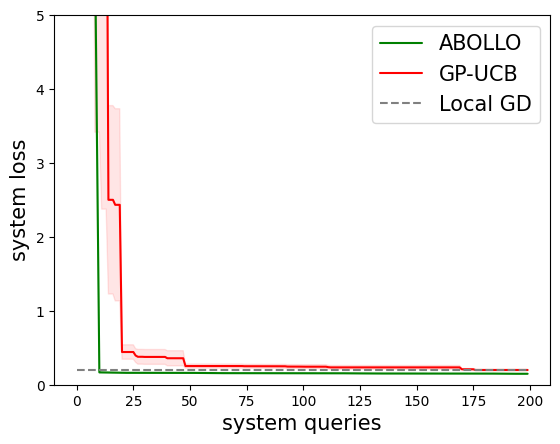

In [ ]:
iterations=200
end_iteration=200

plot_trials_regret("result/mnist_our_BO_data_seed_99_starting_grad_seed_5_noise_pos_0.3_std_0.2_10.csv", legend="ABOLLO",c="green", iteration=iterations, end_iteration=end_iteration)
plot_trials_regret("result/mnist_vanilla_BO_data_seed_99_starting_grad_seed_5_noise_pos_0.3_std_0.2.csv", legend="GP-UCB",c="red", iteration=iterations, end_iteration=end_iteration)
plt.plot(range(0,end_iteration), [0.205]*end_iteration, c="grey", linestyle='--', label="Local GD")
plt.legend(fontsize=15)
#plt.title("System A")

mean shape:  4.487542336071389
std shape:  0.7312467859485388
mean shape:  6.46152881327031
std shape:  0.1720908326094094


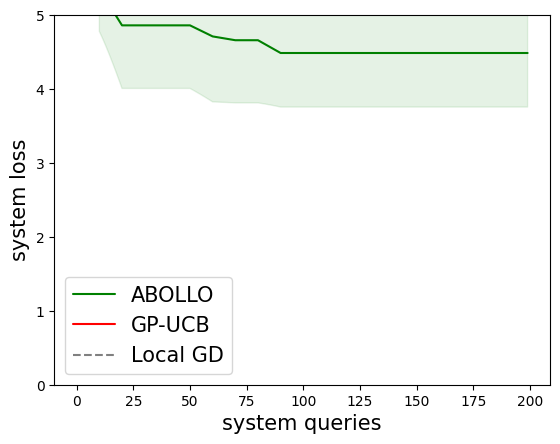

In [ ]:
iterations=200
end_iteration=200

plot_trials_regret("result/health_care_3_neg_1_0.5_start_seed_11_10.csv", legend="ABOLLO",c="green", iteration=iterations, end_iteration=end_iteration)
plot_trials_regret("result/health_care_vanilla_BO.csv", legend="GP-UCB",c="red", iteration=iterations, end_iteration=end_iteration)
plt.plot(range(0,end_iteration), [5.024]*end_iteration, c="grey", linestyle='--', label="Local GD")
plt.legend(fontsize=15)
#plt.title("System A")

mean shape:  0.06370183440524671
std shape:  0.011437472393658216
mean shape:  0.11784845834506028
std shape:  0.044238717124270056
mean shape:  0.05037997122598028
std shape:  0.009839580464590368
mean shape:  0.02854644537920989
std shape:  0.004126931217707039
mean shape:  0.06626481247180183
std shape:  0.031117026023717402


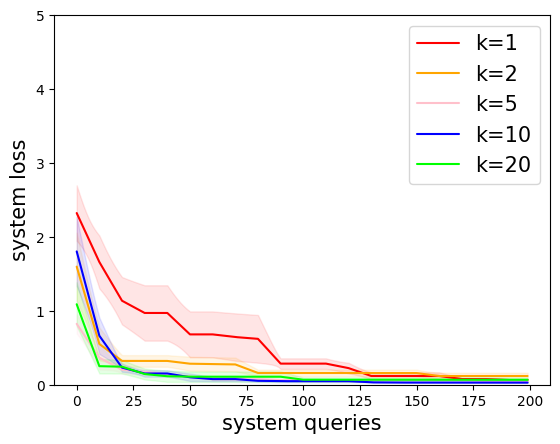

In [ ]:

iterations=200
end_iteration=200
plot_trials_regret("result/our_bo_20_runB_1.csv", legend="k=1",c="red", iteration=iterations, end_iteration=end_iteration)
plot_trials_regret("result/our_bo_20_runB_2.csv", legend="k=2",c="orange", iteration=iterations, end_iteration=end_iteration)
plot_trials_regret("result/our_bo_20_runB_5.csv", legend="k=5",c="pink", iteration=iterations, end_iteration=end_iteration)
plot_trials_regret("result/our_bo_20_runB_10.csv", legend="k=10",c="blue", iteration=iterations, end_iteration=end_iteration)
plot_trials_regret("result/our_bo_20_runB_20.csv", legend="k=20",c="lime", iteration=iterations, end_iteration=end_iteration)
#plot_trials_regret("result/our_bo_20_runB_30.csv", legend="k=30",c="green", iteration=iterations, end_iteration=end_iteration)

#plot_trials_regret("result/vanilla_BO_200_runB.csv", legend="GP-UCB",c="black", iteration=iterations, end_iteration=end_iteration)




In [ ]:

iterations=200
end_iteration=200
# plot_trials_regret("result/BO_k_samples/BO_ours_10_itr_1_samples_new.csv", legend="k=1",c="red", iteration=iterations, end_iteration=end_iteration)
# plot_trials_regret("result/BO_k_samples/BO_ours_10_itr_3_samples_new.csv", legend="k=3",c="orange", iteration=iterations, end_iteration=end_iteration)
# plot_trials_regret("result/BO_k_samples/BO_ours_10_itr_5_samples_new.csv", legend="k=5",c="blue", iteration=iterations, end_iteration=end_iteration)
# plot_trials_regret("result/BO_k_samples/BO_ours_10_itr_10_samples_new.csv", legend="k=10",c="green", iteration=iterations, end_iteration=end_iteration)
# plot_trials_regret("result/BO_k_samples/BO_vanilla_100_itr_compare_k_samples.csv", legend="k=1",c="black", iteration=iterations, end_iteration=end_iteration)

plot_trials_regret("result/BO_k_samples_runA/our_bo_20_runA_2.csv", legend="k=1",c="red", iteration=iterations, end_iteration=end_iteration)
plot_trials_regret("result/BO_k_samples_runA/our_bo_20_runA_5.csv", legend="k=3",c="orange", iteration=iterations, end_iteration=end_iteration)
plot_trials_regret("result/BO_k_samples_runA/our_bo_20_runA_10.csv", legend="k=5",c="blue", iteration=iterations, end_iteration=end_iteration)
plot_trials_regret("result/BO_k_samples_runA/our_bo_20_runA_20.csv", legend="k=10",c="green", iteration=iterations, end_iteration=end_iteration)
#plot_trials_regret("result/BO_k_samples_runA/vanilla_BO_200_runA.csv", legend="k=1",c="black", iteration=iterations, end_iteration=end_iteration)



FileNotFoundError: result/BO_k_samples_runA/our_bo_20_runA_2.csv not found.

In [ ]:
mean = np.mean(np.array(vanilla_all_trials), axis=0)
std = np.std(np.array(vanilla_all_trials), axis=0)


In [ ]:
combined_array_ours = np.vstack((mean[1:], std[1:])).T

In [ ]:
np.savetxt("vanilla_BO_second_run.csv", combined_array_ours)

In [13]:
max_len = max([len(x) for x in vanilla_all_trials])
for x in range(0, len(vanilla_all_trials)):
    while len(vanilla_all_trials[x]) < max_len:
        vanilla_all_trials[x].append(vanilla_all_trials[x][-1])

vanilla_all_trials = np.array(vanilla_all_trials)
np.savetxt("result/turbo_BO_system_A_larger_bound.csv", vanilla_all_trials)

# Vanilla BO over all parameters

In [5]:

# vanilla BO
import botorch
import time
botorch.settings.debug = False
botorch.settings.debug

# ground_truth_param = {1 : np.array([0.7, 0.9, -0.5]), 2: np.array([0.3, 0.7]), 8: np.array([-0.2, -0.2]), 9: np.array([-0.5, 0.5]), 10: np.array([-0.2, 0.1]), 11: np.array([-0.3, 0.3, 0.2]),
#                       12: np.array([0.1, 0.1]), "Blackbox3":np.array([1.2, 0.8]), 4:np.array([1.1, -0.5]), "Blackbox5":np.array([0.7, -0.5]),
#                       "Blackbox6": np.array([0.7, 1.1]), 7: np.array([0.7, -0.5])}


# ground_truth_param = {1 : np.array([0.7, 0.9, -0.5]), 2: np.array([0.3, 0.7]), 8: np.array([-0.2, -0.2]), 9: np.array([-0.5, 0.5]), 10: np.array([-0.2, 0.1]), 11: np.array([-0.3, 0.3, 0.2]),
#                       12: np.array([0.1, 0.1]), "Blackbox3":np.array([0.6, 0.8]), 4:np.array([0.3, -0.5]), "Blackbox5":np.array([0.7, -0.5]),
#                       "Blackbox6": np.array([0.7, .1]), 7: np.array([0.7, -0.5])}


# DG = generate_dg(ground_truth_param,noise=0.05,seed=5)
# print(DG.system_y)
vanilla_all_trials = []
trials = 100
        
for x in range(trials):
    if len(vanilla_all_trials) > 5:
        break

    now = time.time()
    DG.random_initialize_param(100)
    
    try:
        all_best_losses, _, _ = BO_graph_turbo(DG,printout=True,iteration=100,to_normalize_y=False,lower_bound=-2.0, upper_bound=2.0, batch_size=1)
    except:
        print("ERROR")
        continue
    print(len(all_best_losses))
    vanilla_all_trials.append(all_best_losses)
    later = time.time()
    difference = (later - now)
    print("total time taken: ", difference)
# vanilla_all_trials = np.array(vanilla_all_trials)
# np.savetxt("result/turbo_BO_system_A.csv", vanilla_all_trials)

max_len = max([len(x) for x in vanilla_all_trials])
for x in range(0, len(vanilla_all_trials)):
    while len(vanilla_all_trials[x]) < max_len:
        vanilla_all_trials[x].append(vanilla_all_trials[x][-1])

vanilla_all_trials = np.array(vanilla_all_trials)
np.savetxt("result/turbo_BO_system_A_larger_bound_ts.csv", vanilla_all_trials)


tensor([0.2677, 0.3618, 0.7123, 0.0310, 0.5429, 0.3926, 0.8598, 0.8567, 0.9390,
        0.6023, 0.6899, 0.1173, 0.8344, 0.0827, 0.7407, 0.6302, 0.7171, 0.5266,
        0.4053, 0.0307], dtype=torch.float64)
tensor([0.8835, 0.5323, 0.4384, 0.5839, 0.0632, 0.8530, 0.1421, 0.4098, 0.3670,
        0.3500, 0.1466, 0.5263, 0.2361, 0.7582, 0.0213, 0.1728, 0.1199, 0.4027,
        0.6172, 0.9414], dtype=torch.float64)
tensor([0.5582, 0.0151, 0.7817, 0.4364, 0.3042, 0.5484, 0.7383, 0.1981, 0.0784,
        0.1034, 0.4616, 0.9307, 0.5203, 0.2832, 0.2923, 0.8646, 0.4322, 0.9028,
        0.8500, 0.4660], dtype=torch.float64)
tensor([0.1573, 0.8399, 0.0566, 0.9892, 0.8400, 0.1982, 0.2676, 0.5039, 0.7247,
        0.8509, 0.8875, 0.4646, 0.4252, 0.6223, 0.9462, 0.3134, 0.7794, 0.0265,
        0.1263, 0.5017], dtype=torch.float64)
tensor([2.6756e-04, 2.2120e-01, 2.7621e-01, 8.3009e-01, 8.9885e-01, 3.3101e-01,
        5.8729e-01, 1.8249e-02, 2.0853e-01, 3.9852e-01, 2.5123e-01, 3.6364e-01,
        6.2748e-

In [29]:
DG.assign_params(p)
DG.get_system_loss()

tensor(4.8888e+56, dtype=torch.float64)

In [ ]:
DG.nodes[4]["component"].random_initialize_param(5)
for x in range(500):
    DG.nodes[4]["component"].do_one_descent_on_local()
    print( DG.nodes[4]["component"].get_local_loss())

In [ ]:
lower_bound_local_loss

[0.0023370310363580254,
 0.02182823368933498,
 0.009522295390036335,
 0.0018727333275164314,
 0.00017797974239048517,
 0.00028264505535863677,
 2.389802555354134e-06,
 3.650846922870545,
 0.0005591477425660523]

# BO with gradient descent over local loss (ours)

[0.0015831694933001695, 0.021935336483861038, 0.009522057270389434, 0.002665668439066165, 0.00010603166929401985, 0.0007327664850962298, 0.00387224155919354, 8.609590024629746, 0.002706834513054117]
tensor(1.2988, dtype=torch.float64)
BO iteration:  0
Current best objective:  -10000
target loss: tensor([1.6086e+00, 9.7064e-02, 1.8919e+00, 2.4365e-01, 4.4944e-01, 6.5228e-01,
        2.1881e-02, 3.6146e+01, 3.6413e-02], dtype=torch.float64)
reached loss: tensor([[1.6086e+00, 9.7064e-02, 1.8919e+00, 2.4365e-01, 4.4944e-01, 6.5228e-01,
         2.1881e-02, 3.6146e+01, 3.6413e-02]], dtype=torch.float64)
candidate param:  tensor([[2.5167e-03, 2.5111e-02, 3.8867e-02, 4.1880e-03, 4.5953e-04, 1.3498e-03,
         1.2434e-02, 3.5208e+01, 2.8643e-03]], dtype=torch.float64)
time taken for one BO iteration:  0.2976412773132324
BO iteration:  1
Current best objective:  tensor(-1.2972, dtype=torch.float64)
gradient descent performed on number of components (comp * starting pt):  90
time taken for gra

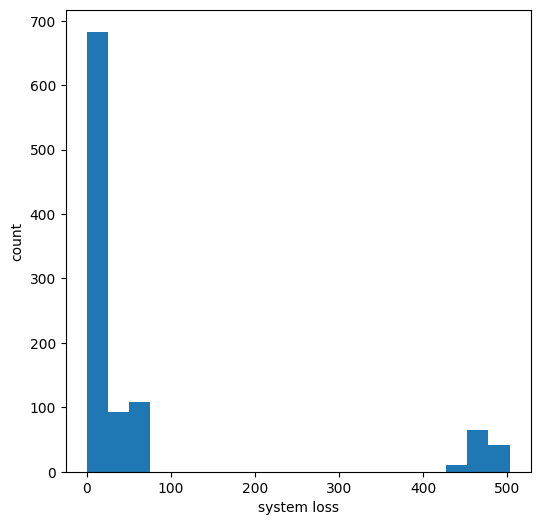

target loss: tensor([2.5167e-03, 2.5111e-02, 3.8867e-02, 4.1880e-03, 4.5953e-04, 1.3498e-03,
        1.2434e-02, 3.5208e+01, 2.8643e-03], dtype=torch.float64)
reached loss: tensor([[2.7625e-03, 4.5459e-02, 3.4186e-02, 2.7735e-01, 3.9243e-04, 1.3579e-03,
         1.2525e-02, 3.8614e+01, 3.1055e-03]], dtype=torch.float64)
candidate param:  tensor([[7.8299e-03, 2.9644e-02, 4.6741e-02, 7.7142e-03, 1.2367e-04, 2.2686e-03,
         1.0710e-02, 2.5695e+01, 8.6387e-03]], dtype=torch.float64)
time taken for one BO iteration:  195.1059775352478
BO iteration:  2
Current best objective:  tensor(-0.0163, dtype=torch.float64)
gradient descent performed on number of components (comp * starting pt):  90
time taken for gradient descent lookup:  14.113770246505737
checking each combination for best
number of system calls:  1000
time taken for system evaluation:  178.49382281303406
best loss:  tensor(0.0139, dtype=torch.float64)


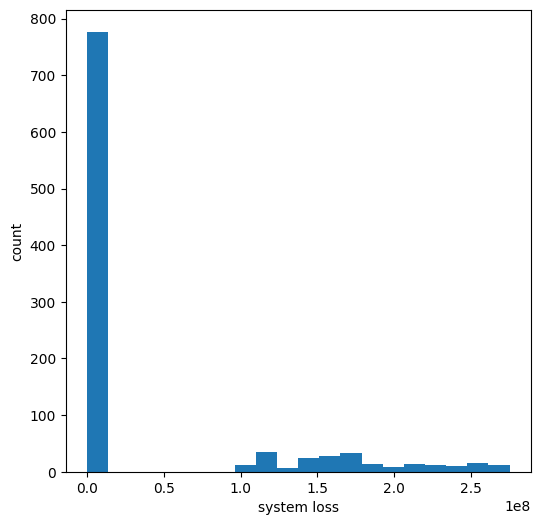

target loss: tensor([7.8299e-03, 2.9644e-02, 4.6741e-02, 7.7142e-03, 1.2367e-04, 2.2686e-03,
        1.0710e-02, 2.5695e+01, 8.6387e-03], dtype=torch.float64)
reached loss: tensor([[8.2380e-03, 2.8867e-02, 5.0069e-02, 5.5266e-02, 2.9785e-04, 2.0723e-03,
         1.1087e-02, 2.3147e+01, 9.3494e-03]], dtype=torch.float64)
candidate param:  tensor([[7.4117e-03, 5.5708e-02, 1.2967e-02, 1.0715e-02, 3.3167e-04, 1.0387e-03,
         1.0238e-02, 9.8774e+00, 8.9746e-03]], dtype=torch.float64)
time taken for one BO iteration:  193.042222738266
BO iteration:  3
Current best objective:  tensor(-0.0139, dtype=torch.float64)
gradient descent performed on number of components (comp * starting pt):  90
time taken for gradient descent lookup:  13.937126636505127
checking each combination for best
number of system calls:  1000
time taken for system evaluation:  177.94027400016785
best loss:  tensor(0.0132, dtype=torch.float64)


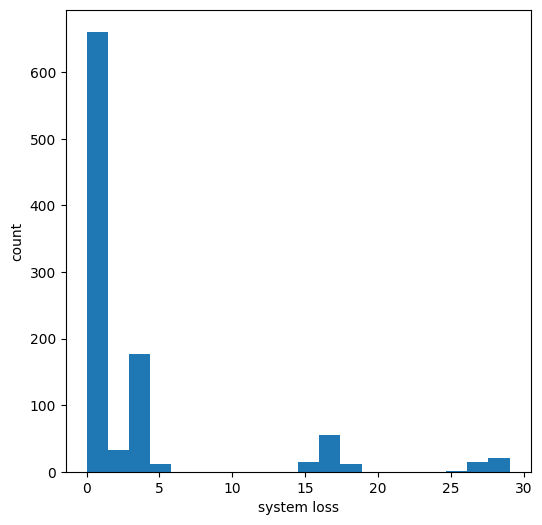

target loss: tensor([7.4117e-03, 5.5708e-02, 1.2967e-02, 1.0715e-02, 3.3167e-04, 1.0387e-03,
        1.0238e-02, 9.8774e+00, 8.9746e-03], dtype=torch.float64)
reached loss: tensor([[8.0167e-03, 5.9627e-02, 1.3890e-02, 5.5296e-02, 4.5459e-04, 1.6405e-03,
         1.0822e-02, 1.0661e+01, 9.7608e-03]], dtype=torch.float64)
candidate param:  tensor([[3.0332e-03, 7.7022e-02, 1.1519e-02, 3.3651e-03, 4.7182e-04, 2.3433e-03,
         1.2357e-02, 3.5628e+01, 1.0001e-02]], dtype=torch.float64)
time taken for one BO iteration:  192.3282401561737
BO iteration:  4
Current best objective:  tensor(-0.0132, dtype=torch.float64)
gradient descent performed on number of components (comp * starting pt):  90
time taken for gradient descent lookup:  12.211991548538208
checking each combination for best
number of system calls:  1000
time taken for system evaluation:  176.86706590652466
best loss:  tensor(0.0481, dtype=torch.float64)


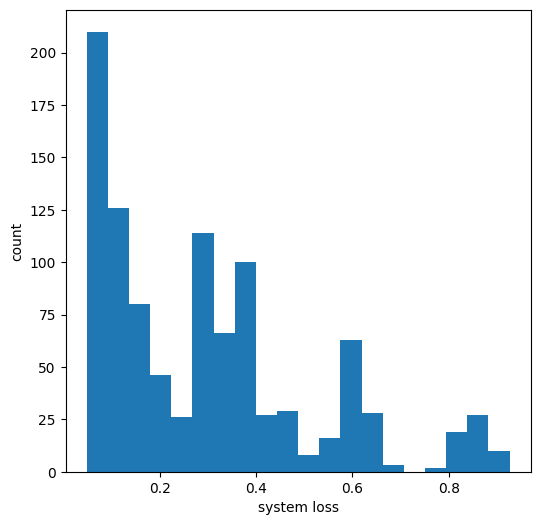

target loss: tensor([3.0332e-03, 7.7022e-02, 1.1519e-02, 3.3651e-03, 4.7182e-04, 2.3433e-03,
        1.2357e-02, 3.5628e+01, 1.0001e-02], dtype=torch.float64)
reached loss: tensor([[3.1489e-03, 8.2481e-02, 1.4556e-02, 3.0175e-01, 5.0276e-04, 1.9757e-03,
         1.2657e-02, 3.2120e+01, 1.0738e-02]], dtype=torch.float64)
candidate param:  tensor([[5.8799e-03, 8.6916e-02, 2.4630e-02, 3.0858e-03, 1.2236e-04, 8.8757e-04,
         1.6293e-02, 4.1746e+01, 8.0764e-03]], dtype=torch.float64)
time taken for one BO iteration:  189.5007529258728
BO iteration:  5
Current best objective:  tensor(-0.0132, dtype=torch.float64)
gradient descent performed on number of components (comp * starting pt):  90
time taken for gradient descent lookup:  16.524914979934692
checking each combination for best
number of system calls:  1000
time taken for system evaluation:  180.0048189163208
best loss:  tensor(0.0256, dtype=torch.float64)


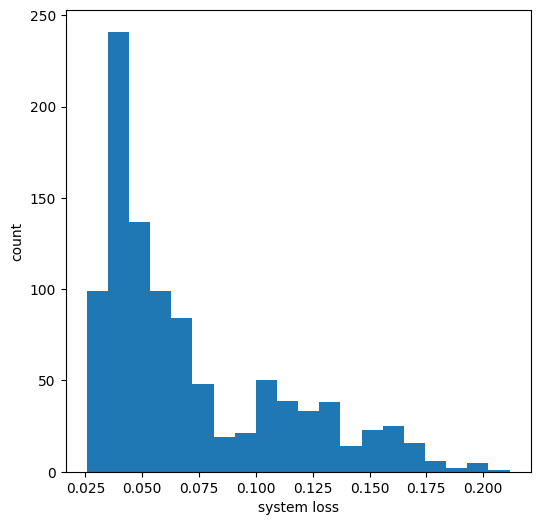

target loss: tensor([5.8799e-03, 8.6916e-02, 2.4630e-02, 3.0858e-03, 1.2236e-04, 8.8757e-04,
        1.6293e-02, 4.1746e+01, 8.0764e-03], dtype=torch.float64)
reached loss: tensor([[5.9687e-03, 9.4458e-02, 2.5843e-02, 5.5281e-02, 2.1804e-04, 6.6808e-04,
         1.6988e-02, 4.5897e+01, 9.0850e-03]], dtype=torch.float64)
candidate param:  tensor([[4.6096e-03, 5.9396e-02, 1.0752e-02, 6.7198e-03, 1.1085e-04, 8.7851e-04,
         1.6640e-02, 1.7317e+01, 1.3432e-02]], dtype=torch.float64)
time taken for one BO iteration:  196.94907236099243
BO iteration:  6
Current best objective:  tensor(-0.0132, dtype=torch.float64)
gradient descent performed on number of components (comp * starting pt):  90
time taken for gradient descent lookup:  16.297479391098022
checking each combination for best
number of system calls:  1000
time taken for system evaluation:  178.2478699684143
best loss:  tensor(0.0195, dtype=torch.float64)


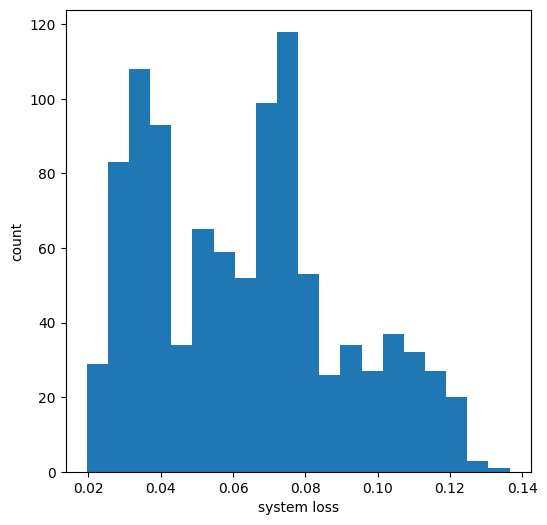

target loss: tensor([4.6096e-03, 5.9396e-02, 1.0752e-02, 6.7198e-03, 1.1085e-04, 8.7851e-04,
        1.6640e-02, 1.7317e+01, 1.3432e-02], dtype=torch.float64)
reached loss: tensor([[4.8367e-03, 6.3374e-02, 6.0048e-03, 2.7738e-01, 1.0400e-04, 6.6853e-04,
         1.7011e-02, 1.9031e+01, 1.4405e-02]], dtype=torch.float64)
candidate param:  tensor([[5.2865e-03, 9.1399e-02, 1.1859e-02, 5.1202e-03, 4.2314e-04, 2.5910e-03,
         1.2758e-02, 2.7314e+01, 1.1401e-02]], dtype=torch.float64)
time taken for one BO iteration:  194.9834108352661
BO iteration:  7
Current best objective:  tensor(-0.0132, dtype=torch.float64)
gradient descent performed on number of components (comp * starting pt):  90
time taken for gradient descent lookup:  13.67348051071167
checking each combination for best
number of system calls:  1000
time taken for system evaluation:  177.5178873538971
best loss:  tensor(0.0155, dtype=torch.float64)


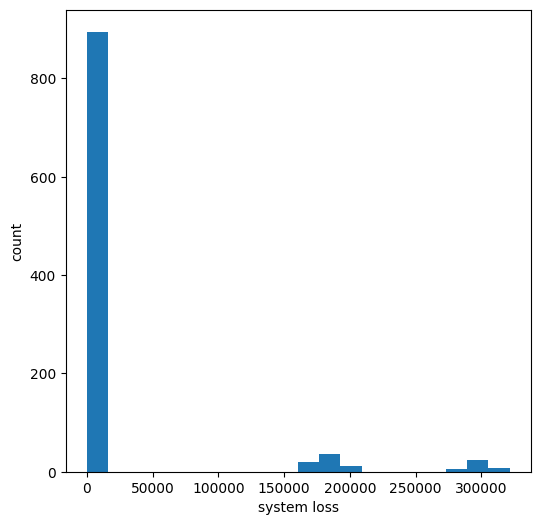

target loss: tensor([5.2865e-03, 9.1399e-02, 1.1859e-02, 5.1202e-03, 4.2314e-04, 2.5910e-03,
        1.2758e-02, 2.7314e+01, 1.1401e-02], dtype=torch.float64)
reached loss: tensor([[5.7645e-03, 9.9029e-02, 6.3327e-03, 2.9449e-01, 3.1432e-04, 2.3447e-03,
         1.3573e-02, 2.4632e+01, 1.2042e-02]], dtype=torch.float64)
candidate param:  tensor([[2.2695e-03, 5.9997e-02, 1.6099e-02, 1.1188e-02, 1.2753e-04, 3.1599e-03,
         4.3092e-03, 2.8569e+01, 6.5744e-03]], dtype=torch.float64)
time taken for one BO iteration:  191.77841353416443
BO iteration:  8
Current best objective:  tensor(-0.0132, dtype=torch.float64)
gradient descent performed on number of components (comp * starting pt):  90
time taken for gradient descent lookup:  14.747453212738037
checking each combination for best
number of system calls:  1000
time taken for system evaluation:  177.8311312198639
best loss:  tensor(0.0331, dtype=torch.float64)


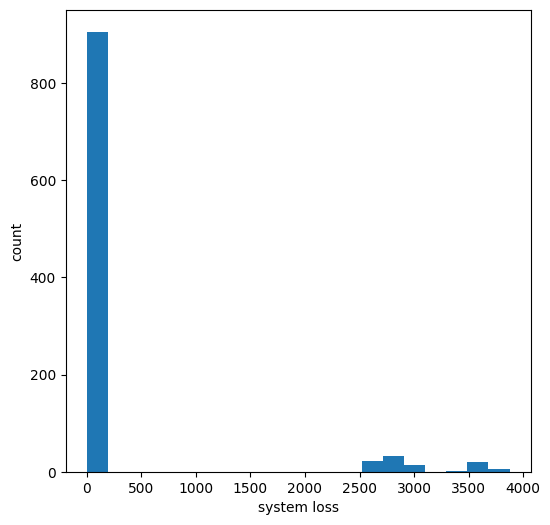

target loss: tensor([2.2695e-03, 5.9997e-02, 1.6099e-02, 1.1188e-02, 1.2753e-04, 3.1599e-03,
        4.3092e-03, 2.8569e+01, 6.5744e-03], dtype=torch.float64)
reached loss: tensor([[2.3218e-03, 6.5148e-02, 1.6441e-02, 3.0348e-01, 7.6753e-05, 1.1027e-01,
         4.2821e-03, 3.1095e+01, 9.3529e-03]], dtype=torch.float64)
candidate param:  tensor([[3.0338e-03, 8.4169e-02, 3.1437e-02, 6.3129e-03, 2.4368e-04, 2.4490e-03,
         1.1189e-02, 1.4540e+01, 1.3399e-02]], dtype=torch.float64)
time taken for one BO iteration:  193.01077842712402
BO iteration:  9
Current best objective:  tensor(-0.0132, dtype=torch.float64)
gradient descent performed on number of components (comp * starting pt):  90
time taken for gradient descent lookup:  9.945385217666626
checking each combination for best
number of system calls:  1000
time taken for system evaluation:  180.76532363891602
best loss:  tensor(0.0261, dtype=torch.float64)


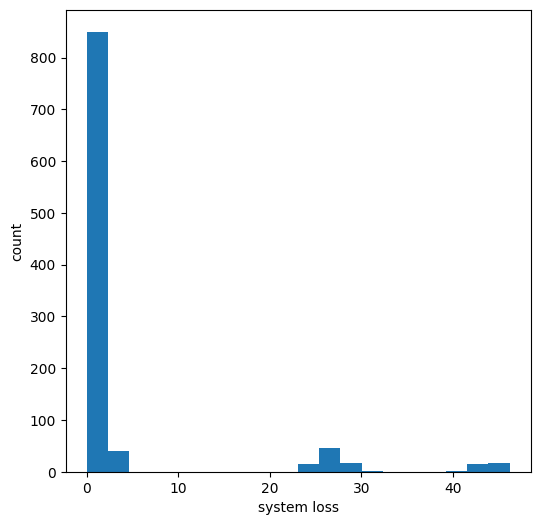

target loss: tensor([3.0338e-03, 8.4169e-02, 3.1437e-02, 6.3129e-03, 2.4368e-04, 2.4490e-03,
        1.1189e-02, 1.4540e+01, 1.3399e-02], dtype=torch.float64)
reached loss: tensor([[3.0660e-03, 8.9407e-02, 3.2878e-02, 5.5260e-02, 1.5990e-04, 2.4745e-03,
         1.1229e-02, 1.3119e+01, 1.4704e-02]], dtype=torch.float64)
candidate param:  tensor([[2.4308e-03, 9.2382e-02, 4.0381e-02, 1.2700e-02, 3.6837e-04, 3.2370e-03,
         1.0381e-02, 2.7570e+01, 6.3933e-03]], dtype=torch.float64)
time taken for one BO iteration:  191.16115260124207
BO iteration:  10
Current best objective:  tensor(-0.0132, dtype=torch.float64)
gradient descent performed on number of components (comp * starting pt):  90
time taken for gradient descent lookup:  9.586740732192993
checking each combination for best
number of system calls:  1000
time taken for system evaluation:  177.46352529525757
best loss:  tensor(0.0170, dtype=torch.float64)


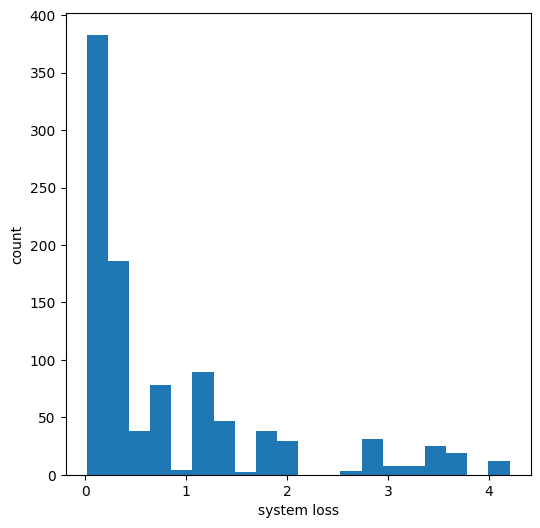

target loss: tensor([2.4308e-03, 9.2382e-02, 4.0381e-02, 1.2700e-02, 3.6837e-04, 3.2370e-03,
        1.0381e-02, 2.7570e+01, 6.3933e-03], dtype=torch.float64)
reached loss: tensor([[2.4379e-03, 1.0035e-01, 4.2328e-02, 2.1803e-01, 3.4814e-04, 3.0247e-03,
         1.1302e-02, 2.5153e+01, 9.1096e-03]], dtype=torch.float64)
candidate param:  tensor([[3.2418e-03, 8.7965e-02, 3.3415e-02, 1.3018e-02, 2.4908e-04, 8.8455e-04,
         1.2690e-02, 2.9628e+01, 1.1825e-02]], dtype=torch.float64)
time taken for one BO iteration:  187.54061317443848
BO iteration:  11
Current best objective:  tensor(-0.0132, dtype=torch.float64)
gradient descent performed on number of components (comp * starting pt):  90
time taken for gradient descent lookup:  12.069418668746948
checking each combination for best
number of system calls:  1000
time taken for system evaluation:  178.26763224601746
best loss:  tensor(0.0167, dtype=torch.float64)


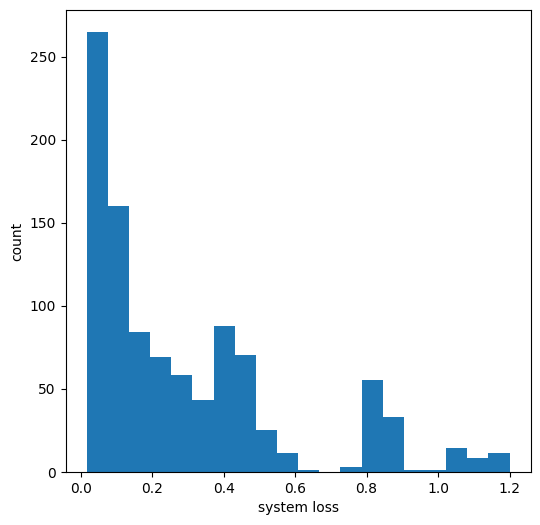

target loss: tensor([3.2418e-03, 8.7965e-02, 3.3415e-02, 1.3018e-02, 2.4908e-04, 8.8455e-04,
        1.2690e-02, 2.9628e+01, 1.1825e-02], dtype=torch.float64)
reached loss: tensor([[3.4339e-03, 9.2458e-02, 3.4511e-02, 3.0346e-01, 2.2367e-04, 1.8092e-03,
         1.1696e-02, 3.2573e+01, 1.2867e-02]], dtype=torch.float64)
candidate param:  tensor([[5.5704e-03, 7.8123e-02, 3.8228e-02, 4.5076e-03, 3.4875e-04, 3.2399e-03,
         9.1499e-03, 1.6018e+01, 5.9514e-03]], dtype=torch.float64)
time taken for one BO iteration:  190.81006813049316
BO iteration:  12
Current best objective:  tensor(-0.0132, dtype=torch.float64)
gradient descent performed on number of components (comp * starting pt):  90
time taken for gradient descent lookup:  11.355104446411133
checking each combination for best
number of system calls:  1000
time taken for system evaluation:  177.32737183570862
best loss:  tensor(0.0265, dtype=torch.float64)


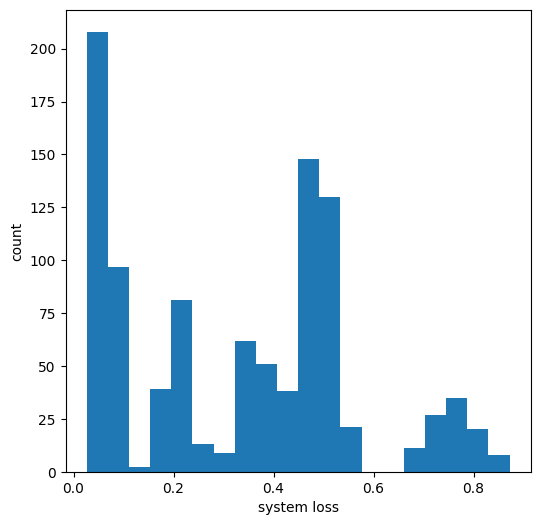

target loss: tensor([5.5704e-03, 7.8123e-02, 3.8228e-02, 4.5076e-03, 3.4875e-04, 3.2399e-03,
        9.1499e-03, 1.6018e+01, 5.9514e-03], dtype=torch.float64)
reached loss: tensor([[5.8891e-03, 8.3470e-02, 3.9938e-02, 5.5433e-02, 3.1299e-04, 3.0950e-03,
         1.0044e-02, 1.7500e+01, 9.2700e-03]], dtype=torch.float64)
candidate param:  tensor([[2.2956e-03, 5.7833e-02, 2.4179e-02, 2.7555e-03, 3.7088e-04, 2.7683e-03,
         1.8922e-02, 4.1784e+01, 4.3528e-03]], dtype=torch.float64)
time taken for one BO iteration:  189.2601022720337
BO iteration:  13
Current best objective:  tensor(-0.0132, dtype=torch.float64)
gradient descent performed on number of components (comp * starting pt):  90
time taken for gradient descent lookup:  12.703691959381104
checking each combination for best
number of system calls:  1000
time taken for system evaluation:  177.57493567466736
best loss:  tensor(0.1400, dtype=torch.float64)


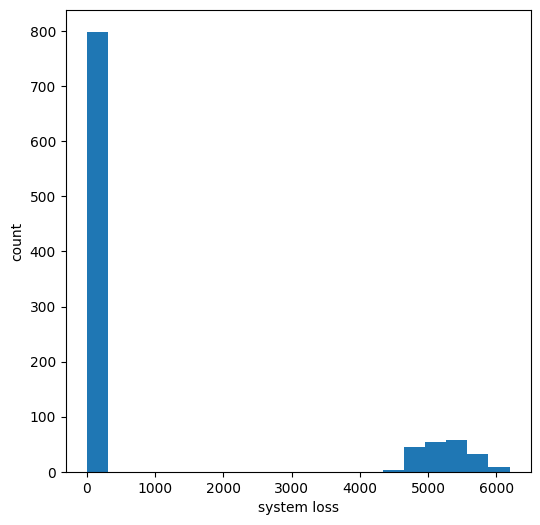

target loss: tensor([2.2956e-03, 5.7833e-02, 2.4179e-02, 2.7555e-03, 3.7088e-04, 2.7683e-03,
        1.8922e-02, 4.1784e+01, 4.3528e-03], dtype=torch.float64)
reached loss: tensor([[4.4193e-03, 6.3399e-02, 2.5662e-02, 5.5282e-02, 3.0106e-02, 2.8045e-03,
         2.0385e-02, 3.7660e+01, 4.4090e-03]], dtype=torch.float64)
candidate param:  tensor([[3.8680e-03, 1.0573e-01, 2.9795e-02, 3.4862e-03, 2.0214e-04, 7.9797e-04,
         1.0393e-02, 4.2377e+01, 1.0430e-02]], dtype=torch.float64)
time taken for one BO iteration:  190.99773478507996
BO iteration:  14
Current best objective:  tensor(-0.0132, dtype=torch.float64)
gradient descent performed on number of components (comp * starting pt):  90
time taken for gradient descent lookup:  13.798537492752075
checking each combination for best
number of system calls:  1000
time taken for system evaluation:  179.49279522895813
best loss:  tensor(0.3872, dtype=torch.float64)


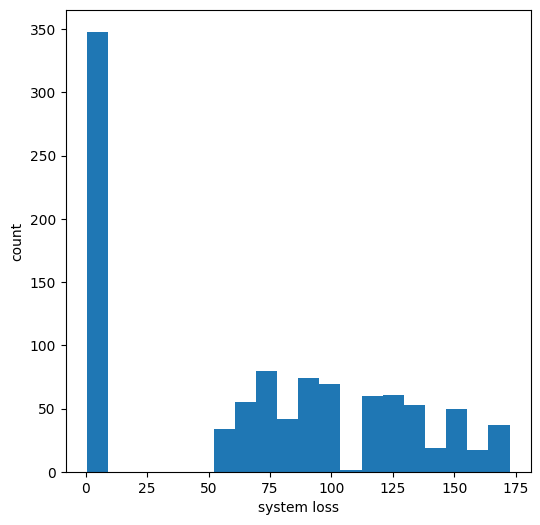

target loss: tensor([3.8680e-03, 1.0573e-01, 2.9795e-02, 3.4862e-03, 2.0214e-04, 7.9797e-04,
        1.0393e-02, 4.2377e+01, 1.0430e-02], dtype=torch.float64)
reached loss: tensor([[1.5223e-02, 1.1436e-01, 3.2387e-02, 2.7733e-01, 1.7466e-04, 7.6918e-04,
         1.1429e-02, 4.6603e+01, 1.1370e-02]], dtype=torch.float64)
candidate param:  tensor([[3.7866e-03, 4.2113e-02, 3.4429e-02, 7.5981e-03, 2.3641e-04, 3.5274e-03,
         1.0829e-02, 4.2802e+01, 4.3962e-03]], dtype=torch.float64)
time taken for one BO iteration:  193.8122992515564
BO iteration:  15
Current best objective:  tensor(-0.0132, dtype=torch.float64)
gradient descent performed on number of components (comp * starting pt):  90
time taken for gradient descent lookup:  15.99106478691101
checking each combination for best
number of system calls:  1000
time taken for system evaluation:  180.32629537582397
best loss:  tensor(0.0267, dtype=torch.float64)


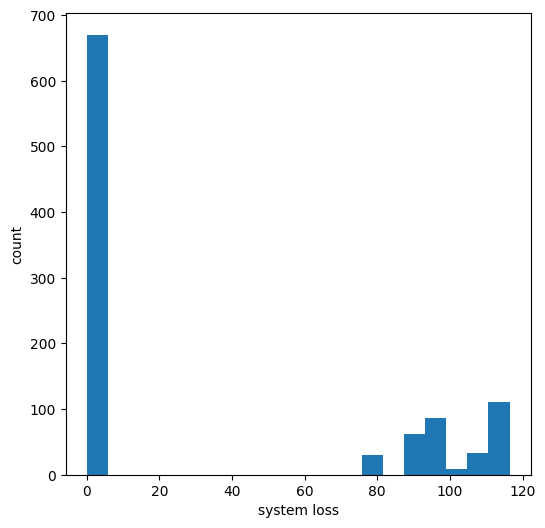

target loss: tensor([3.7866e-03, 4.2113e-02, 3.4429e-02, 7.5981e-03, 2.3641e-04, 3.5274e-03,
        1.0829e-02, 4.2802e+01, 4.3962e-03], dtype=torch.float64)
reached loss: tensor([[4.1258e-03, 4.5845e-02, 3.6462e-02, 5.5253e-02, 1.4633e-04, 7.4470e-02,
         1.0677e-02, 4.6986e+01, 9.3396e-03]], dtype=torch.float64)
candidate param:  tensor([[4.8211e-03, 6.2092e-02, 1.5166e-02, 8.3276e-03, 4.4567e-04, 2.8709e-03,
         4.3120e-03, 8.7430e+00, 8.7686e-03]], dtype=torch.float64)
time taken for one BO iteration:  196.81408166885376
BO iteration:  16
Current best objective:  tensor(-0.0132, dtype=torch.float64)
gradient descent performed on number of components (comp * starting pt):  90
time taken for gradient descent lookup:  7.708752155303955
checking each combination for best
number of system calls:  1000
time taken for system evaluation:  179.9917757511139
best loss:  tensor(0.0442, dtype=torch.float64)


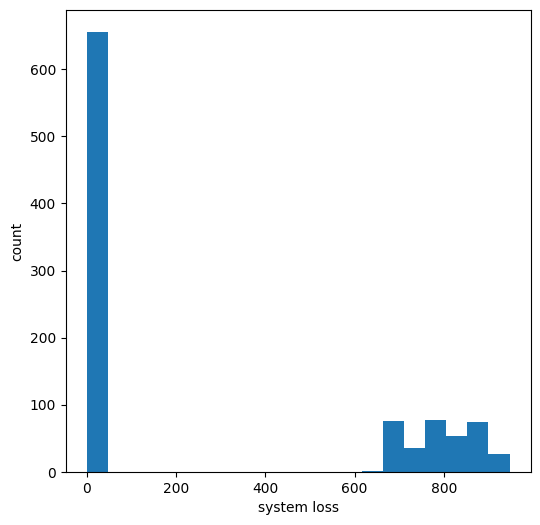

target loss: tensor([4.8211e-03, 6.2092e-02, 1.5166e-02, 8.3276e-03, 4.4567e-04, 2.8709e-03,
        4.3120e-03, 8.7430e+00, 8.7686e-03], dtype=torch.float64)
reached loss: tensor([[5.2834e-03, 6.7986e-02, 1.6532e-02, 5.5331e-02, 4.4973e-04, 2.9058e-03,
         4.0469e-03, 9.5428e+00, 9.4482e-03]], dtype=torch.float64)
candidate param:  tensor([[6.7163e-03, 7.0213e-02, 4.5236e-02, 5.8430e-03, 1.6167e-04, 2.6829e-03,
         1.3379e-02, 2.8034e+01, 7.4717e-03]], dtype=torch.float64)
time taken for one BO iteration:  188.19415163993835
BO iteration:  17
Current best objective:  tensor(-0.0132, dtype=torch.float64)
gradient descent performed on number of components (comp * starting pt):  90
time taken for gradient descent lookup:  16.581661462783813
checking each combination for best
number of system calls:  1000
time taken for system evaluation:  178.35605311393738
best loss:  tensor(0.0155, dtype=torch.float64)


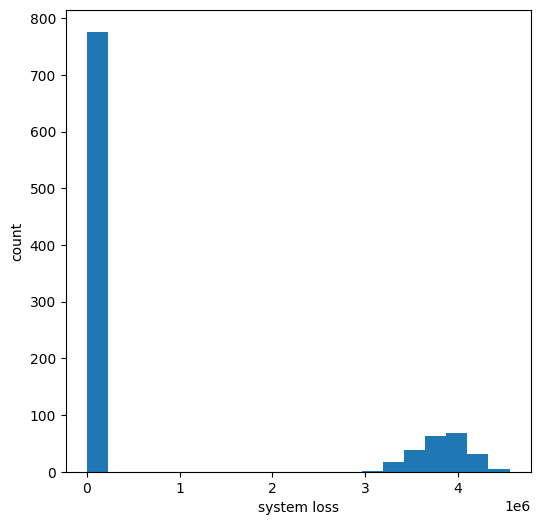

target loss: tensor([6.7163e-03, 7.0213e-02, 4.5236e-02, 5.8430e-03, 1.6167e-04, 2.6829e-03,
        1.3379e-02, 2.8034e+01, 7.4717e-03], dtype=torch.float64)
reached loss: tensor([[7.3684e-03, 6.4181e-02, 4.6737e-02, 2.7736e-01, 1.5226e-04, 2.7547e-03,
         1.4393e-02, 2.5276e+01, 9.2460e-03]], dtype=torch.float64)
candidate param:  tensor([[2.3841e-03, 5.9389e-02, 3.3451e-02, 4.7948e-03, 4.5860e-04, 3.4827e-03,
         9.9747e-03, 4.2915e+01, 6.6515e-03]], dtype=torch.float64)
time taken for one BO iteration:  195.37486362457275
BO iteration:  18
Current best objective:  tensor(-0.0132, dtype=torch.float64)
gradient descent performed on number of components (comp * starting pt):  90
time taken for gradient descent lookup:  11.727504014968872
checking each combination for best
number of system calls:  1000
time taken for system evaluation:  179.70301938056946
best loss:  tensor(0.0236, dtype=torch.float64)


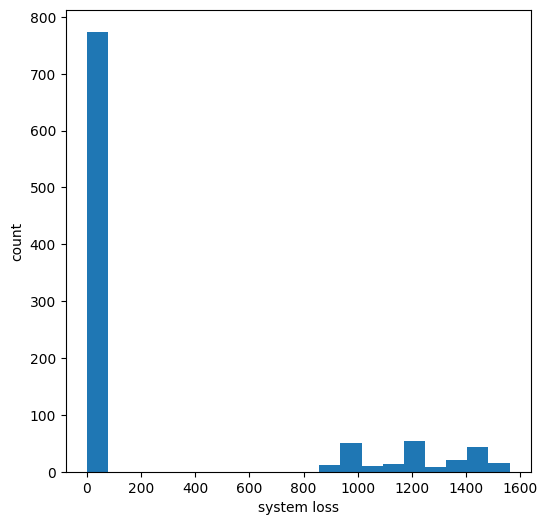

target loss: tensor([2.3841e-03, 5.9389e-02, 3.3451e-02, 4.7948e-03, 4.5860e-04, 3.4827e-03,
        9.9747e-03, 4.2915e+01, 6.6515e-03], dtype=torch.float64)
reached loss: tensor([[2.6145e-03, 6.4946e-02, 3.4926e-02, 5.5320e-02, 4.4507e-04, 3.1807e-03,
         1.0351e-02, 4.7193e+01, 9.2990e-03]], dtype=torch.float64)
candidate param:  tensor([[4.0343e-03, 6.7856e-02, 2.7903e-02, 8.7701e-03, 3.1816e-04, 3.4037e-03,
         1.5751e-02, 2.8572e+01, 7.2440e-03]], dtype=torch.float64)
time taken for one BO iteration:  191.95987248420715
BO iteration:  19
Current best objective:  tensor(-0.0132, dtype=torch.float64)
gradient descent performed on number of components (comp * starting pt):  90
time taken for gradient descent lookup:  12.571247816085815
checking each combination for best
number of system calls:  1000
time taken for system evaluation:  178.98844242095947
best loss:  tensor(0.0320, dtype=torch.float64)


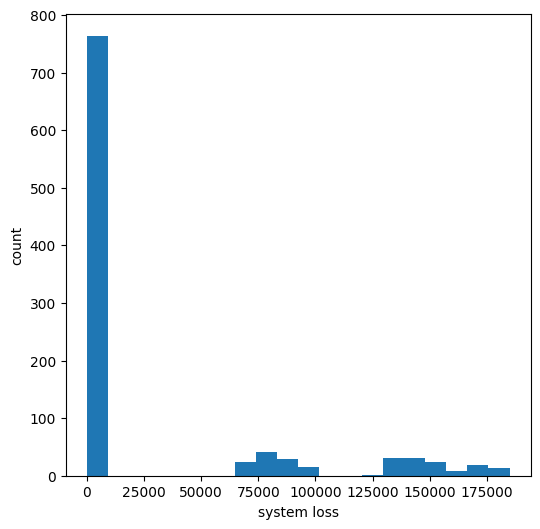

target loss: tensor([4.0343e-03, 6.7856e-02, 2.7903e-02, 8.7701e-03, 3.1816e-04, 3.4037e-03,
        1.5751e-02, 2.8572e+01, 7.2440e-03], dtype=torch.float64)
reached loss: tensor([[4.3456e-03, 6.3193e-02, 2.9676e-02, 2.7739e-01, 3.3066e-04, 3.0466e-03,
         1.5464e-02, 2.5801e+01, 7.0465e-03]], dtype=torch.float64)
candidate param:  tensor([[1.6253e-03, 3.0252e-02, 1.3534e-02, 3.0733e-03, 5.1775e-04, 3.0897e-03,
         8.5618e-03, 4.2660e+01, 1.1670e-02]], dtype=torch.float64)
time taken for one BO iteration:  192.12075924873352
BO iteration:  20
Current best objective:  tensor(-0.0132, dtype=torch.float64)
gradient descent performed on number of components (comp * starting pt):  90
time taken for gradient descent lookup:  12.728266954421997
checking each combination for best
number of system calls:  1000
time taken for system evaluation:  178.22361612319946
best loss:  tensor(0.0417, dtype=torch.float64)


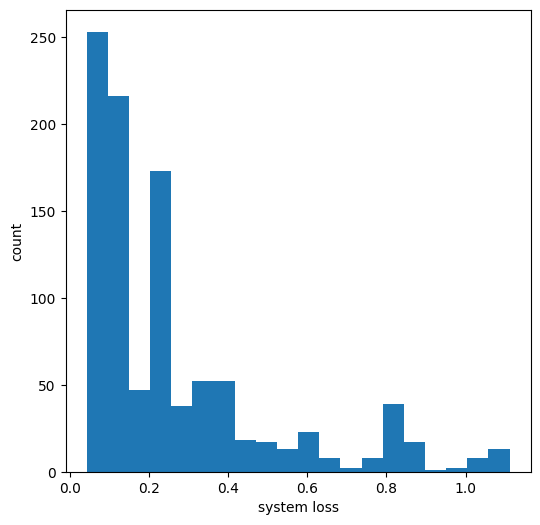

target loss: tensor([1.6253e-03, 3.0252e-02, 1.3534e-02, 3.0733e-03, 5.1775e-04, 3.0897e-03,
        8.5618e-03, 4.2660e+01, 1.1670e-02], dtype=torch.float64)
reached loss: tensor([[1.7873e-03, 4.1541e-02, 1.3561e-02, 5.5430e-02, 5.6726e-04, 3.0204e-03,
         8.9320e-03, 4.6814e+01, 1.2258e-02]], dtype=torch.float64)
candidate param:  tensor([[6.4759e-03, 4.5048e-02, 9.8268e-03, 1.0718e-02, 4.5771e-04, 1.0019e-03,
         1.6301e-02, 4.1532e+01, 4.7436e-03]], dtype=torch.float64)
time taken for one BO iteration:  191.62489128112793
0
total time taken:  3847.326196193695


In [14]:
import random
import time
trials = 100
print(lower_bound_local_loss)
samples = [1000]
sample_result = []
trials_ = 1
for s in samples:
    loss_space_bo_all_trials = []
    for x in range(trials):
        if len(loss_space_bo_all_trials) >= trials_:
            break
        #try:
        now = time.time()
        DG.random_initialize_param(100)
        print(DG.get_system_loss())
        # BO with local loss -> system loss
        if (DG.get_system_loss() > 100):
            continue

        bounds = torch.tensor([np.array(lower_bound_local_loss) * 1.0, np.array(lower_bound_local_loss) * 5])
        #all_best_losses_ours, best_param = BO_graph_local_loss(DG, bounds, "multi_search", samples=s, iteration=10)
        all_best_losses_ours, best_param = BO_graph_local_loss(DG, bounds, "multi_search", samples=s, printout=True, to_normalize_y=True, ignore_error=True, num_starting_points=10, iteration=21)
        loss_space_bo_all_trials.append(all_best_losses_ours)
        later = time.time()
        difference = (later - now)
        print("total time taken: ", difference)
        sample_result.append(loss_space_bo_all_trials)
        #except:
        #    print("error")
        #    continue
loss_space_bo_all_trials = np.array(loss_space_bo_all_trials)
#np.savetxt("result/BO_heter_error_inferred.csv", loss_space_bo_all_trials)

In [ ]:
loss_space_bo_all_trials = [x[0] for x in loss_space_bo_all_trials]


# Plot the losses

In [ ]:
s_loss_from_grad = all_loss['system']
best_from_grad = min(s_loss_from_grad)
plt.plot(range(len(all_best_losses)), [-x for x in all_best_losses], label="BO over system parameters")
plt.plot(range(len(s_loss_from_grad)), [best_from_grad for x in range(len(s_loss_from_grad))], '--', c='black', label="Best system loss with local gradient descent", alpha=0.3)
plt.plot(range(len(all_best_losses_ours)), [-x for x in all_best_losses_ours], label="BO over local losses (with parameter lookup)")
plt.legend()
plt.title("System Loss over number of system queries")
plt.show()


In [ ]:
all_best_losses

# Perform partitioning based on M.I, and perform optimization of each sub-system

In [ ]:
# assign M.I to each component
DG = generate_dg()
DG = assign_mi(DG)

# get decomposition via some partitioning method
all_black_box = ["Blackbox3", "Blackbox5", "Blackbox6"]
all_decomp = find_all_decomposition_full(all_black_box, DG)
all_valid_decomp = get_all_valid_decomposition(all_decomp)
best_decomposition, score = get_best_decomposition(all_valid_decomp, DG, l=1, measure="mi")

# for each decomposition, optimize it
for sub_system_set in best_decomposition:
    print("subsystem: ", sub_system_set)
    graph_temp = copy.deepcopy(DG)
    sub_system = generate_sub_system(sub_system_set, graph_temp, ground_truth_param)
    X,y = get_end_to_end_data(sub_system,ground_truth_param)
    
    sub_system.system_x = X
    sub_system.system_y = y
    
    # vanilla BO
    # all_best_losses, _, _ = BO_graph(graph_temp,printout=False,iteration=10)
    
    # ours
    sub_system.random_initialize_param()
    sub_system.fit_locally_partial(100)

    lower_bound_local_loss = show_system_loss_from_grad_descent(sub_system, itr=1000, plot=True)
    lower_bound_local_loss = [x.detach().numpy().tolist() for x in lower_bound_local_loss]
    print("system loss at after descent: ", sub_system.get_system_loss())
    sub_system.random_initialize_param()
    bounds = torch.tensor([np.array(lower_bound_local_loss), np.array(lower_bound_local_loss) * 3])
    all_best_losses_ours, best_param = BO_graph_local_loss(sub_system, bounds, "multi_search", iteration=10)
    break


# For debugging purposes: provide a fixed partitioning

In [ ]:

DG.random_initialize_param()
sub_system = {1, 2, 'Blackbox3'}
sub_system = generate_sub_system(sub_system, DG, ground_truth_param)
print("subsystem local loss: ", sub_system.get_local_losses())
print("subsystem system loss: ", sub_system.get_system_loss())

# vanilla
# all_best_losses, _, _ = BO_graph(sub_system,printout=False,iteration=50)

# ours
sub_system.random_initialize_param()
sub_system.fit_locally_partial(100)

lower_bound_local_loss = show_system_loss_from_grad_descent(sub_system, itr=500, plot=False)
lower_bound_local_loss = [x.detach().numpy().tolist() for x in lower_bound_local_loss]
bounds = torch.tensor([np.array(lower_bound_local_loss)*1.1, np.array(lower_bound_local_loss) * 3])
all_best_losses_ours, best_param = BO_graph_local_loss(sub_system, bounds, "multi_search", iteration=10)

In [ ]:
from Models.ModelMNIST import ModelMNIST
from mnist.MNISTLoader import *
from helper import *

ground_truth_param_mnist = {1 : np.array([0.7, 1.1, -0.5]), 2: np.array([1.3, -.7]), 12: np.array([0.1, 0.1]), "Blackbox3":np.array([1.2, 0.8]), 4:np.array([-0.3])}

def create_mnist_system():
    np.random.seed(10)
    dg_nn = DirectedFunctionalGraph()
    # white box components
    local_mnist,system_mnist = generate_data_loader(num_datapts=100,batch_size=100,label_int=5)
    dg_nn.add_node("nn_1", component=ModelMNIST(local_train_loader=local_mnist, system_train_loader=system_mnist, output_size=2))

    dg_nn.add_node(2, component=ModelWeightedSum())
    x,y = get_data_tree(dg_nn.nodes[2]["component"], 0, 5, ground_truth_param_mnist[2])
    dg_nn.nodes[2]["component"].attach_local_data(x,y)
    
    dg_nn.add_node(4, component=ModelSigmoid())
    x,y = get_data(dg_nn.nodes[4]["component"], 0, 5, ground_truth_param_mnist[4])
    dg_nn.nodes[4]["component"].attach_local_data(x,y)

    dg_nn.add_node("Blackbox3", component=ModelWeightedSum())
    dg_nn.add_edge(("nn_1", 2), "Blackbox3")
    dg_nn.add_edge("Blackbox3", 4)

    x,y = get_end_to_end_nn_data(dg_nn, ground_truth_param_mnist)

    dg_nn.system_x = x
    dg_nn.system_y = y
    dg_nn.get_system_loss()
    return dg_nn



In [ ]:
dg_nn = create_mnist_system()
nx.draw_networkx(dg_nn)
plt.show()

In [ ]:
dg_nn.get_all_params()

In [ ]:
dg_nn.nodes["Blackbox3"]["component"].get_params()

In [ ]:
ground_truth_param[2] = np.array([1,1])

In [ ]:
dg_nn.get_system_loss()

In [ ]:
dg_nn.forward({2: [4.738, 1.733], "nn_1":dg_nn.system_x[2][0]}, "Blackbox3", perturbed_black_box=False)

In [ ]:
dg_nn.system_x[2][1]

In [ ]:
dg_nn.system_y[2]

In [ ]:
input = dg_nn.system_x[2][1]
dg_nn.nodes[2]["component"](np.array(input))

In [ ]:
dg_nn.system_x[0][0].shape

In [ ]:
dg_nn.nodes["nn_1"]["component"].y[:20]

In [ ]:
data = dg_nn.nodes["nn_1"]["component"].X[:20]
data = data.unsqueeze(1)
dg_nn.nodes["nn_1"]["component"].evaluate(data)

In [ ]:
print(dg_nn.nodes["nn_1"]["component"].evaluate(data))

In [ ]:
dg_nn.random_initialize_param()
dg_nn.nodes[2]["component"].set_params([0.5,0.5])
print(dg_nn.get_all_params())
print(dg_nn.nodes["nn_1"]["component"].evaluate(data))
print("local loss: ", dg_nn.nodes["nn_1"]["component"].get_local_loss())
print("system loss: ", dg_nn.get_system_loss())
print(" ")
print(dg_nn.system_x[2][1])
print(dg_nn.forward({2: [4.738, 1.733], "nn_1":dg_nn.system_x[2][0]}, "Blackbox3", perturbed_black_box=False))
print(dg_nn.system_y[2])
for x in range(250):
    
    dg_nn.nodes["nn_1"]["component"].do_one_descent_on_local()
    data = dg_nn.nodes["nn_1"]["component"].X[:10]
    data = data.unsqueeze(1)

print(dg_nn.nodes["nn_1"]["component"].evaluate(data))
print("local loss: ", dg_nn.nodes["nn_1"]["component"].get_local_loss())
print("system loss: ", dg_nn.get_system_loss())
print(" ")
print(dg_nn.system_x[2][1])
print(dg_nn.forward({2: [4.738, 1.733], "nn_1":dg_nn.system_x[2][0]}, "Blackbox3", perturbed_black_box=False))
print(dg_nn.system_y[2])

In [ ]:

DG.random_initialize_param()
# BO with local loss -> system loss
DG.fit_locally_partial(100)

bounds = torch.tensor([np.array(lower_bound_local_loss), np.array(lower_bound_local_loss) * 3])
all_best_losses_ours, best_param = BO_graph_local_loss(DG, bounds, "multi_search", iteration=10)

In [ ]:
#grad descent
dg_nn.random_initialize_param()

lower_bound_local_loss = show_system_loss_from_grad_descent(dg_nn, itr=300, plot=True)
lower_bound_local_loss = [x.detach().numpy().tolist() for x in lower_bound_local_loss]

In [ ]:
dg_nn.random_initialize_param()
print(dg_nn.get_all_params())

In [ ]:
dg_nn.random_initialize_param()
# BO with local loss -> system loss
dg_nn.fit_locally_partial(50)

bounds = torch.tensor([np.array(lower_bound_local_loss), np.array(lower_bound_local_loss) * 3])
all_best_losses_ours, best_param = BO_graph_local_loss(dg_nn, bounds, "nn_lookup", iteration=10)

In [ ]:
dg_nn.random_initialize_param()

In [ ]:

dg_nn.random_initialize_param()
for x in range(100):
    print("local loss: ", dg_nn.nodes["nn_1"]["component"].get_local_loss())
    print("system loss: ", dg_nn.get_system_loss())
    dg_nn.nodes["nn_1"]["component"].do_one_descent_on_local()

In [ ]:
from scipy.stats import beta, uniform
from scipy.stats import norm
from scipy.stats import truncnorm
from scipy.stats import truncexpon, expon
samples=200
uniform_samples = uniform.rvs(2, 5, size=samples)

(array([4., 2., 1., 1., 0., 2., 1., 0., 0., 0., 1., 0., 1., 1., 2., 1., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.]),
 array([0.63699624, 0.73422576, 0.83145528, 0.9286848 , 1.02591431,
        1.12314383, 1.22037335, 1.31760287, 1.41483238, 1.5120619 ,
        1.60929142, 1.70652094, 1.80375045, 1.90097997, 1.99820949,
        2.09543901, 2.19266852, 2.28989804, 2.38712756, 2.48435708,
        2.58158659, 2.67881611, 2.77604563, 2.87327515, 2.97050466,
        3.06773418, 3.1649637 , 3.26219322, 3.35942273, 3.45665225,
        3.55388177]),
 <BarContainer object of 30 artists>)

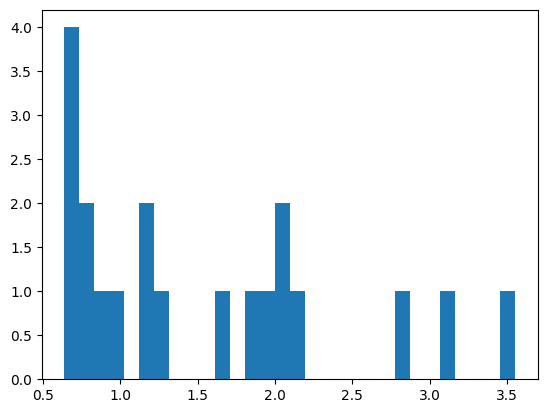

In [ ]:
samples=20
truncexp_samples = truncexpon.rvs(b=10,loc=0.6,scale=1, size=samples)
plt.hist(truncexp_samples,bins=30)

In [ ]:
samples = uniform_samples
res = truncexpon.fit(samples, fb=max(samples), fscale=1, method="mm")
print(res)
b, loc, scale = res[0], res[1], res[2]
#np.sum(np.log(truncexpon(res).pdf(truncexp_samples)))
lln_exp = np.sum(np.log(0.001 + truncexpon(b,loc,scale).pdf(samples)))

res = uniform.fit(samples, method="mle")
loc, scale = res[0], res[1]
print(res)
lln_uni = np.sum(np.log(0.001 + uniform(min(samples),max(samples) - min(samples)).pdf(samples)))

print(lln_exp)
print(lln_uni)

(6.954951665613755, 3.3893584857187333, 1)
(2.0122476136371215, 4.942704051976634)
-671.5455853682432
-318.59640627859244


In [ ]:
x_min_estimator = []
x_debiased_estimator = []
for x in range(500):
    uniform_samples = uniform.rvs(2, 3, size=samples)
    x_min_estimator.append((sorted(uniform_samples)[1]))
    x_debiased_estimator.append(sorted(uniform_samples)[1] - (3 / (samples + 1)))
    


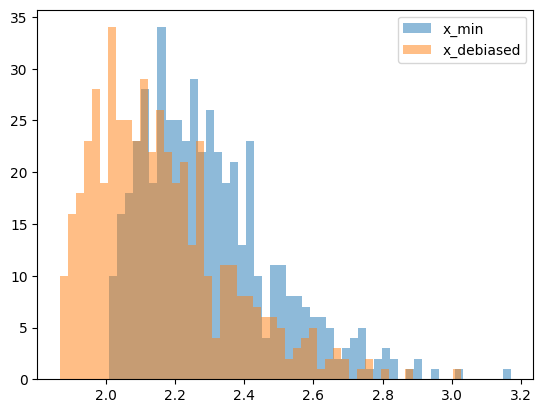

In [ ]:
plt.hist(x_min_estimator, label="x_min",alpha=0.5,bins=50)
plt.hist(x_debiased_estimator, label="x_debiased",alpha=0.5, bins=50)
plt.legend()
plt.show()


In [ ]:

beta_a = 1
beta_k = 100
alpha = 10
samples = 1000
exp_lambda = 1
trunc_norm_mean = 1
trunc_norm_std = 0.5

beta_samples = alpha * beta.rvs(beta_a, beta_k, size=samples)
normal_samples = norm.rvs(0, 0.5, size=samples)
trunc_exp_samples = truncexpon.rvs(alpha, size=samples) * exp_lambda
trunc_norm_samples = (truncnorm.rvs(0, alpha, size=samples) + trunc_norm_mean) / trunc_norm_std

plt.hist(beta_samples + normal_samples,bins=100,label="beta noise",alpha=0.5)
plt.hist(trunc_exp_samples + normal_samples,bins=100,label="trunc exp noise",alpha=0.5)
plt.hist(trunc_norm_samples + normal_samples,bins=100,label="trunc norm noise",alpha=0.5)
plt.hist(normal_samples,bins=100,label="normal only",alpha=0.5)
plt.legend()
plt.show()


In [ ]:
from scipy.stats import norm, expon

# Create a Normal distribution with mean 0 and standard deviation 1
normal_dist = norm(loc=0, scale=1)

# Create an Exponential distribution with scale parameter 2
exponential_dist = expon(scale=2)

# Combine the two distributions by adding them
combined_dist = normal_dist + exponential_dist

TypeError: unsupported operand type(s) for +: 'rv_continuous_frozen' and 'rv_continuous_frozen'

2.0781399999999994

In [4]:

def get_mean_best_loss(k, itr):
    

    path = "result/\
healthcare_ABOLLO_data_seed_3_starting_grad_seed_800_noise_pos_-2.5_std_0.5.csv_" +str(k)+"_" + str(itr) + ".csv"
    my_data = genfromtxt(path, delimiter=' ')
    my_data_mean = np.mean(my_data, axis=0)
    return(-my_data_mean[-1])

def plot_matrix(samples, bo_itr):
    arr = np.zeros((len(samples), len(bo_itr)))
    for idx_k, k in enumerate(samples):
        for idx_itr, itr in enumerate(bo_itr):
            best_loss = get_mean_best_loss(k,itr)
            arr[idx_k][idx_itr] = (best_loss)
    
    return (arr)


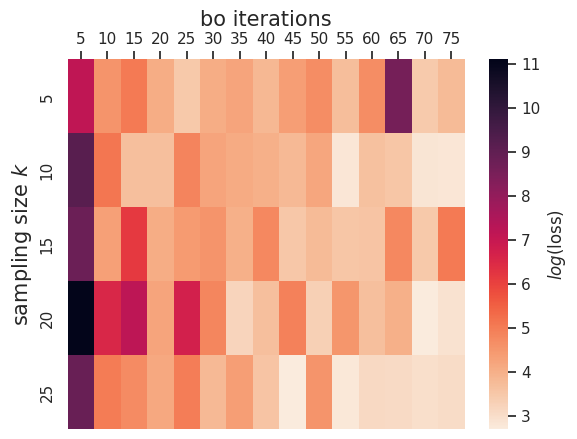

In [7]:
import seaborn as sns
sns.set(font_scale=1.0)
bo_iteration = range(5,80,5)
k = [5,10,15,20,25]
arr=plot_matrix(k, bo_iteration)
s=sns.heatmap(arr, yticklabels=k, xticklabels=bo_iteration, 
              cmap=sns.cm.rocket_r, cbar_kws={'label': '$log$(loss)'})
s.set_xlabel('bo iterations', fontsize=15)
s.set_ylabel('sampling size $k$', fontsize=15)
s.xaxis.set_label_position('top')
s.xaxis.set_ticks_position('top')